On importe les bibliothèques nécessaires à l'implémentation du modèle linéaire

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

On charge la base de données sur laquelle on va travailler et on la met en forme

In [3]:
path="/Users/capucinerousset/Desktop/projet-python/"
file_name1="dataset_complet_part_1.csv"
file_name2="dataset_complet_part_2.csv"
df1 = pd.read_csv(path+file_name1, sep=',',low_memory=False)
df2 = pd.read_csv(path+file_name2, sep=',',low_memory=False)
df = pd.concat([df1,df2])

df = df.loc[df['an'] == 2019]
df['grav'] = df['grav'].replace({1:0,2:0,3:1,4:1})

df = df.drop(columns=['Num_Acc','an','adr','lat','long','lartpc','larrout','com','gps','voie','dep','v2','pr','pr1'])
#ici on enlève an car on ne regarde que pour 2019
df['hrmn'] = df['hrmn'].str.split(':').str[0]

df.to_csv('svm.csv', index=False)

y = df['grav']
X = df.drop(columns=['grav'])
features = X.columns

On implémente le modèle de régression linéaire

In [7]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Inférer les valeurs non renseignées
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

#Ajuster Y pour fitter avec la nouvelle base de features
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

#Créer le modèle linéaire et l'entrainer sur les bases test
model = LinearRegression()
model.fit(X_train_imp, y_train)

#Tester le modèle sur la base de features test
y_pred = model.predict(X_test_imp)

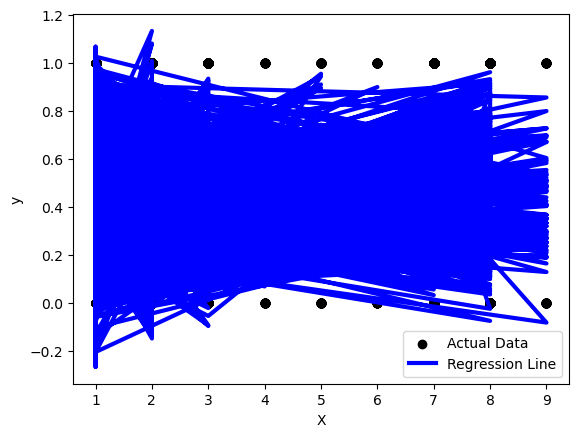

In [14]:
plt.scatter(X_test_imp[:,6], y_test, color='black', label='Actual Data')
plt.plot(X_test_imp[:,6], y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Gravity')
plt.legend()
plt.show()

On calcule le R2 afin de mesurer la performance du modèle

In [18]:
# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.122581192737938


In [20]:
# On récupère les coefficients
coefficients = model.coef_

# Les associer à leur feature 
X_train_imp = pd.DataFrame(X_train_imp)
feature_importance = list(zip(X_train_imp.columns, coefficients))

for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

0: -0.0020956722003259527
1: 0.00021621072701462785
2: -0.00014433694030086723
3: 0.0052190990634237554
4: -0.2660160556012651
5: -0.00309507780845054
6: 0.005410003550319949
7: 0.01498705866469151
8: 0.02319058924461179
9: 0.08648651037491518
10: 0.049931319955786126
11: -0.05570166328749759
12: -0.002728678519104884
13: 0.018051789407435768
14: 0.03858448924666496
15: -0.011963870398099933
16: 0.0029253866681804054
17: 0.039732965336483385
18: 0.00028113059911780315
